## Library

In [22]:
from os import path

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp
import umap.umap_ as umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
import pandas as pd
import plotly.express as px
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


if 'Sarabun' not in [x.name for x in matplotlib.font_manager.fontManager.ttflist]:
    matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
matplotlib.rc('font', family='Sarabun')

## Pull data

In [9]:
df = pd.read_csv('data/raw/Adequecy2.csv', encoding='cp874')

In [10]:
df

,จังหวัด,staff_total,elderly,equipment_total,hospital_gold,opd,ipd
0,กรุงเทพมหานคร,73850,1456740,35961,1946,188134.853100,19375.052050
1,กระบี่,2013,72843,1185,224,3506.045455,797.800000
2,กาญจนบุรี,3311,186627,2171,295,6364.279720,1525.816438
3,กาฬสินธุ์,3393,180552,2037,518,6001.839161,1439.416438
4,กำแพงเพชร,2575,206479,1239,368,5931.821678,1014.526027
...,...,...,...,...,...,...,...
72,อำนาจเจริญ,1371,65212,802,198,3030.965035,569.780822
73,อุดรธานี,6330,288957,3727,651,13314.164340,2557.063014
74,อุตรดิตถ์,2398,105086,1130,351,3310.944056,802.128767
75,อุทัยธานี,1493,71108,905,156,3659.909091,608.221918


## Feature scaling 

In [11]:
df["x1_staff_per_elderly"] = df["staff_total"] / df["elderly"]
df["x2_hospital_per_elderly"] = df["hospital_gold"] / df["elderly"]
df["x3_equipment_per_elderly"] = df["equipment_total"] / df["elderly"]
df["x4_visits_per_elderly"] = (df["ipd"]) / df["elderly"]
# df[["x1_staff_per_elderly","x2_hospital_per_elderly","x3_equipment_per_elderly","x4_visits_per_elderly"]]
cols = ["x1_staff_per_elderly","x2_hospital_per_elderly",
        "x3_equipment_per_elderly","x4_visits_per_elderly"]
X = df[cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=cols, index=df.index)

df_scaled

,x1_staff_per_elderly,x2_hospital_per_elderly,x3_equipment_per_elderly,x4_visits_per_elderly
0,3.944894,-1.608731,3.218146,2.064127
1,0.595917,1.436616,0.817901,0.997329
2,-0.840867,-1.180038,-0.503684,-0.264208
3,-0.688221,1.075696,-0.603697,-0.356643
4,-1.606241,-0.827096,-2.109597,-1.746436
...,...,...,...,...
72,-0.364170,1.368581,-0.313925,-0.009041
73,-0.235990,-0.002979,-0.142915,0.041812
74,-0.103395,1.900645,-0.754522,-0.510777
75,-0.368165,-0.106433,-0.191670,-0.092581


In [12]:
data_list = df_scaled.round(3).values.tolist()
data_list

[[3.945, -1.609, 3.218, 2.064],
 [0.596, 1.437, 0.818, 0.997],
 [-0.841, -1.18, -0.504, -0.264],
 [-0.688, 1.076, -0.604, -0.357],
 [-1.606, -0.827, -2.11, -1.746],
 [0.946, -0.328, 0.549, 1.044],
 [2.25, 0.874, 2.285, 2.279],
 [0.094, -0.887, 0.429, 0.375],
 [1.82, -0.475, 2.052, 1.332],
 [-0.084, 0.018, -0.372, -0.296],
 [-1.01, 0.877, -0.503, -0.947],
 [0.792, 0.048, 1.265, 1.969],
 [-0.571, 0.222, -0.695, -0.872],
 [0.746, -0.584, 1.093, 0.858],
 [0.83, 0.656, 0.615, 0.651],
 [0.731, 0.522, 1.117, 0.845],
 [-0.529, -0.56, -0.357, -0.133],
 [3.547, 0.458, 3.403, 3.422],
 [0.446, -0.891, 0.383, -0.319],
 [-0.685, 0.561, -0.495, -0.591],
 [-0.478, -1.059, -0.353, -0.433],
 [0.038, 0.878, 0.512, 0.527],
 [-0.518, -0.434, -0.751, -0.632],
 [0.739, -1.183, 0.345, -0.475],
 [-0.127, -0.12, -0.24, 0.109],
 [-0.279, -0.094, -0.569, -0.445],
 [-1.165, -0.569, -1.0, -1.143],
 [-0.485, -0.106, -0.347, -0.109],
 [0.102, -1.475, 0.105, 0.043],
 [-0.459, -1.244, 0.213, 0.103],
 [-0.557, -0.809, -

array([[<Axes: title={'center': 'x1_staff_per_elderly'}>,
        <Axes: title={'center': 'x2_hospital_per_elderly'}>],
       [<Axes: title={'center': 'x3_equipment_per_elderly'}>,
        <Axes: title={'center': 'x4_visits_per_elderly'}>]], dtype=object)

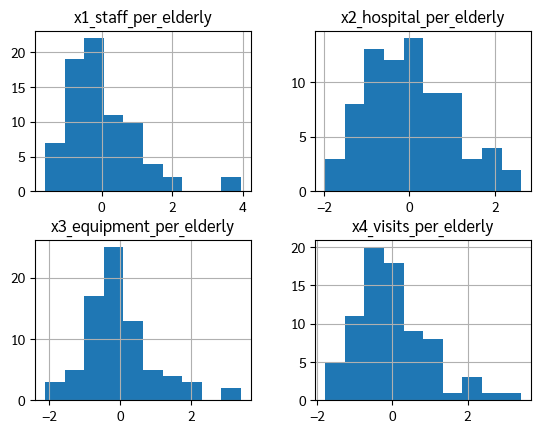

In [13]:
df_scaled.hist()

In [14]:
df_new = pd.concat([df, df_scaled.add_prefix("z_")], axis=1)
df_new

,จังหวัด,staff_total,elderly,equipment_total,hospital_gold,opd,ipd,x1_staff_per_elderly,x2_hospital_per_elderly,x3_equipment_per_elderly,x4_visits_per_elderly,z_x1_staff_per_elderly,z_x2_hospital_per_elderly,z_x3_equipment_per_elderly,z_x4_visits_per_elderly
0,กรุงเทพมหานคร,73850,1456740,35961,1946,188134.853100,19375.052050,0.050695,0.001336,0.024686,0.013300,3.944894,-1.608731,3.218146,2.064127
1,กระบี่,2013,72843,1185,224,3506.045455,797.800000,0.027635,0.003075,0.016268,0.010952,0.595917,1.436616,0.817901,0.997329
2,กาญจนบุรี,3311,186627,2171,295,6364.279720,1525.816438,0.017741,0.001581,0.011633,0.008176,-0.840867,-1.180038,-0.503684,-0.264208
3,กาฬสินธุ์,3393,180552,2037,518,6001.839161,1439.416438,0.018792,0.002869,0.011282,0.007972,-0.688221,1.075696,-0.603697,-0.356643
4,กำแพงเพชร,2575,206479,1239,368,5931.821678,1014.526027,0.012471,0.001782,0.006001,0.004913,-1.606241,-0.827096,-2.109597,-1.746436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,อำนาจเจริญ,1371,65212,802,198,3030.965035,569.780822,0.021024,0.003036,0.012298,0.008737,-0.364170,1.368581,-0.313925,-0.009041
73,อุดรธานี,6330,288957,3727,651,13314.164340,2557.063014,0.021906,0.002253,0.012898,0.008849,-0.235990,-0.002979,-0.142915,0.041812
74,อุตรดิตถ์,2398,105086,1130,351,3310.944056,802.128767,0.022819,0.003340,0.010753,0.007633,-0.103395,1.900645,-0.754522,-0.510777
75,อุทัยธานี,1493,71108,905,156,3659.909091,608.221918,0.020996,0.002194,0.012727,0.008553,-0.368165,-0.106433,-0.191670,-0.092581


## LLM label 

In [15]:
gpt5   = [2,2,0,1,0,1,2,1,2,1,1,1,1,1,2,2,0,2,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,2,1,0,0,0,0,1,2,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,2,0,0,0,0,2,0,0,2,0,0,0,2,1,1,2,1,0,1,1]
claude = [2,1,1,1,0,1,2,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,2,1,0,1,0,0,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,2,0,0,2,1,1,0,1,1,1,1,1,1]
gemini = [2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0]  # จาก Gemini
grok =   [2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0]
deepseek  = [2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0]

label = pd.DataFrame({
    "GPT5": gpt5,
    "Claude": claude,
    "Gemini": gemini,
    "Grok": grok,
    "deepseek": deepseek
})

final_labels = []

for i in range(len(label)):
    votes = label.iloc[i].values
    cnt = Counter(votes)
    
    top_counts = cnt.most_common()
    
    if len(top_counts) > 1 and top_counts[0][1] == top_counts[1][1]:
        final_labels.append(1)   # tie-break 
    else:
        final_labels.append(top_counts[0][0]) 

label["Final"] = final_labels


In [16]:
df_labeling = df_new.copy()
df_labeling["GPT5"]     = gpt5
df_labeling["Claude"]   = claude
df_labeling["Gemini"]   = gemini
df_labeling["Grok"]     = grok
df_labeling["DeepSeek"] = deepseek
df_labeling["Final"]    = final_labels
df_labeling.head()

,จังหวัด,staff_total,elderly,equipment_total,hospital_gold,opd,ipd,x1_staff_per_elderly,x2_hospital_per_elderly,x3_equipment_per_elderly,...,z_x1_staff_per_elderly,z_x2_hospital_per_elderly,z_x3_equipment_per_elderly,z_x4_visits_per_elderly,GPT5,Claude,Gemini,Grok,DeepSeek,Final
0,กรุงเทพมหานคร,73850,1456740,35961,1946,188134.853100,19375.052050,0.050695,0.001336,0.024686,...,3.944894,-1.608731,3.218146,2.064127,2,2,2,2,2,2
1,กระบี่,2013,72843,1185,224,3506.045455,797.800000,0.027635,0.003075,0.016268,...,0.595917,1.436616,0.817901,0.997329,2,1,2,1,1,1
2,กาญจนบุรี,3311,186627,2171,295,6364.279720,1525.816438,0.017741,0.001581,0.011633,...,-0.840867,-1.180038,-0.503684,-0.264208,0,1,0,0,0,0
3,กาฬสินธุ์,3393,180552,2037,518,6001.839161,1439.416438,0.018792,0.002869,0.011282,...,-0.688221,1.075696,-0.603697,-0.356643,1,1,1,1,1,1
4,กำแพงเพชร,2575,206479,1239,368,5931.821678,1014.526027,0.012471,0.001782,0.006001,...,-1.606241,-0.827096,-2.109597,-1.746436,0,0,0,0,0,0


In [17]:
df_labeling.columns

Index(['จังหวัด', 'staff_total', 'elderly', 'equipment_total', 'hospital_gold',
       'opd', 'ipd', 'x1_staff_per_elderly', 'x2_hospital_per_elderly',
       'x3_equipment_per_elderly', 'x4_visits_per_elderly',
       'z_x1_staff_per_elderly', 'z_x2_hospital_per_elderly',
       'z_x3_equipment_per_elderly', 'z_x4_visits_per_elderly', 'GPT5',
       'Claude', 'Gemini', 'Grok', 'DeepSeek', 'Final'],
      dtype='object')

In [41]:
llm_cols = ["GPT5","Claude","Gemini","Grok","DeepSeek","Final"]
heatmap_matrix = df_labeling[llm_cols].values
province_names = df_labeling["จังหวัด"].tolist()

n_rows = len(province_names)
n_cols = len(llm_cols)

import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
    z=heatmap_matrix,
    x=llm_cols,
    y=list(range(n_rows)),     # ใช้ตัวเลขเป็นแกนก่อน
    colorscale="Viridis",
    showscale=True,
    zmin=0, zmax=2,
    colorbar=dict(title="Label<br>(0–2)")
))

# --- add grid lines ---
shapes = []
for i in range(n_rows + 1):
    shapes.append(
        dict(
            type="line",
            x0=-0.5, y0=i-0.5,
            x1=n_cols-0.5, y1=i-0.5,
            line=dict(color="white", width=0.5)
        )
    )

for j in range(n_cols + 1):
    shapes.append(
        dict(
            type="line",
            x0=j-0.5, y0=-0.5,
            x1=j-0.5, y1=n_rows-0.5,
            line=dict(color="white", width=0.5)
        )
    )

# --- update layout ---
fig.update_layout(
    title="LLM Label Agreement Heatmap",
    width=1200,
    height=2200,       # ขยายสูงขึ้นเพื่อให้ชื่อไม่ทับกัน
    template="plotly_white",
    shapes=shapes,
    xaxis=dict(tickangle=45),

    # === จุดสำคัญที่สุด ===
    yaxis=dict(
        tickmode="array",
        tickvals=list(range(n_rows)),
        ticktext=province_names,
        automargin=True
    ),
    margin=dict(l=250, r=50, t=100, b=50)  # ขยายซ้ายให้เห็นชื่อยาวๆ
)

fig.show()


In [42]:
df_labeling[df_labeling['จังหวัด'] == 'ร้อยเอ็ด']

,จังหวัด,staff_total,elderly,equipment_total,hospital_gold,opd,ipd,x1_staff_per_elderly,x2_hospital_per_elderly,x3_equipment_per_elderly,...,z_x1_staff_per_elderly,z_x2_hospital_per_elderly,z_x3_equipment_per_elderly,z_x4_visits_per_elderly,GPT5,Claude,Gemini,Grok,DeepSeek,Final
50,ร้อยเอ็ด,4767,240691,2827,903,10244.11189,1800.69863,0.019805,0.003752,0.011745,...,-0.541092,2.621299,-0.471601,-0.579702,0,1,2,0,1,1


## EDA label

In [23]:
color_map = {
    "Low": "#440457",        # พร้อมน้อย
    "Moderate": "#228f8b",   # พร้อมกลาง
    "High": "#f9e844"        # พร้อมมาก
}

In [24]:
features = [
    "z_x1_staff_per_elderly",
    "z_x2_hospital_per_elderly",
    "z_x3_equipment_per_elderly",
    "z_x4_visits_per_elderly"
]

X = df_labeling[features].values
df_labeling.loc[df_labeling["จังหวัด"] == "สมุทรสาคร", "Final"] = 2
df_labeling[df_labeling['จังหวัด'] == 'สมุทรสาคร'] 

umap_model = umap.UMAP(
    n_neighbors=10,
    min_dist=0.1,
    metric="euclidean",
    random_state=42
)

X_umap = umap_model.fit_transform(X)
df_umap = df_labeling.copy()
df_umap["UMAP1"] = X_umap[:,0]
df_umap["UMAP2"] = X_umap[:,1]
df_umap["label_str"] = df_umap["Final"].map({
    0: "Low",
    1: "Moderate",
    2: "High"
})
fig = px.scatter(
    df_umap,
    x="UMAP1",
    y="UMAP2",
    color="label_str",
    color_discrete_map=color_map,
    hover_name="จังหวัด",
    hover_data={
        "staff_total": True,
        "equipment_total": True,
        "hospital_gold": True,
        "elderly": True,
        "ipd": True,
        "x1_staff_per_elderly": True,
        "x2_hospital_per_elderly": True,
        "x3_equipment_per_elderly": True,
        "x4_visits_per_elderly": True,
        "z_x1_staff_per_elderly": True,
        "z_x2_hospital_per_elderly": True,
        "z_x3_equipment_per_elderly": True,
        "z_x4_visits_per_elderly": True,
        "GPT5": True,
        "Claude": True,
        "Gemini": True,
        "Grok": True,
        "DeepSeek": True,
        "Final": True,
    },
    title="UMAP Projection Colored by LLM Readiness Labels"
)

fig.update_traces(marker=dict(size=11, opacity=0.92,
                              line=dict(width=1, color="DarkSlateGrey")))
fig.update_layout(
    width=1000, 
    height=800, 
    template="plotly_white"
)

fig.show()


d:\mini\envs\pine\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [48]:
df_labeling[df_labeling['จังหวัด'] == 'อุบลราชธานี']

,จังหวัด,staff_total,elderly,equipment_total,hospital_gold,opd,ipd,x1_staff_per_elderly,x2_hospital_per_elderly,x3_equipment_per_elderly,...,z_x1_staff_per_elderly,z_x2_hospital_per_elderly,z_x3_equipment_per_elderly,z_x4_visits_per_elderly,GPT5,Claude,Gemini,Grok,DeepSeek,Final
76,อุบลราชธานี,8657,401029,5081,870,16346.77622,3863.153425,0.021587,0.002169,0.01267,...,-0.282375,-0.149204,-0.207983,0.39794,1,1,0,0,0,0


In [16]:
df_umap['Final'].value_counts()

Final
1    37
0    32
2     8
Name: count, dtype: int64

In [25]:
color_map = {
    0: "#440457",   
    1: "#228f8b",   
    2: "#f9e844"    
}

In [26]:
for f in features:
    fig = px.box(
        df_labeling,
        x="Final",
        y=f,
        color="Final",
        color_discrete_map=color_map,
        title=f"Distribution of {f} by Label"
    )
    fig.update_layout(height=500, width=700)
    fig.show()


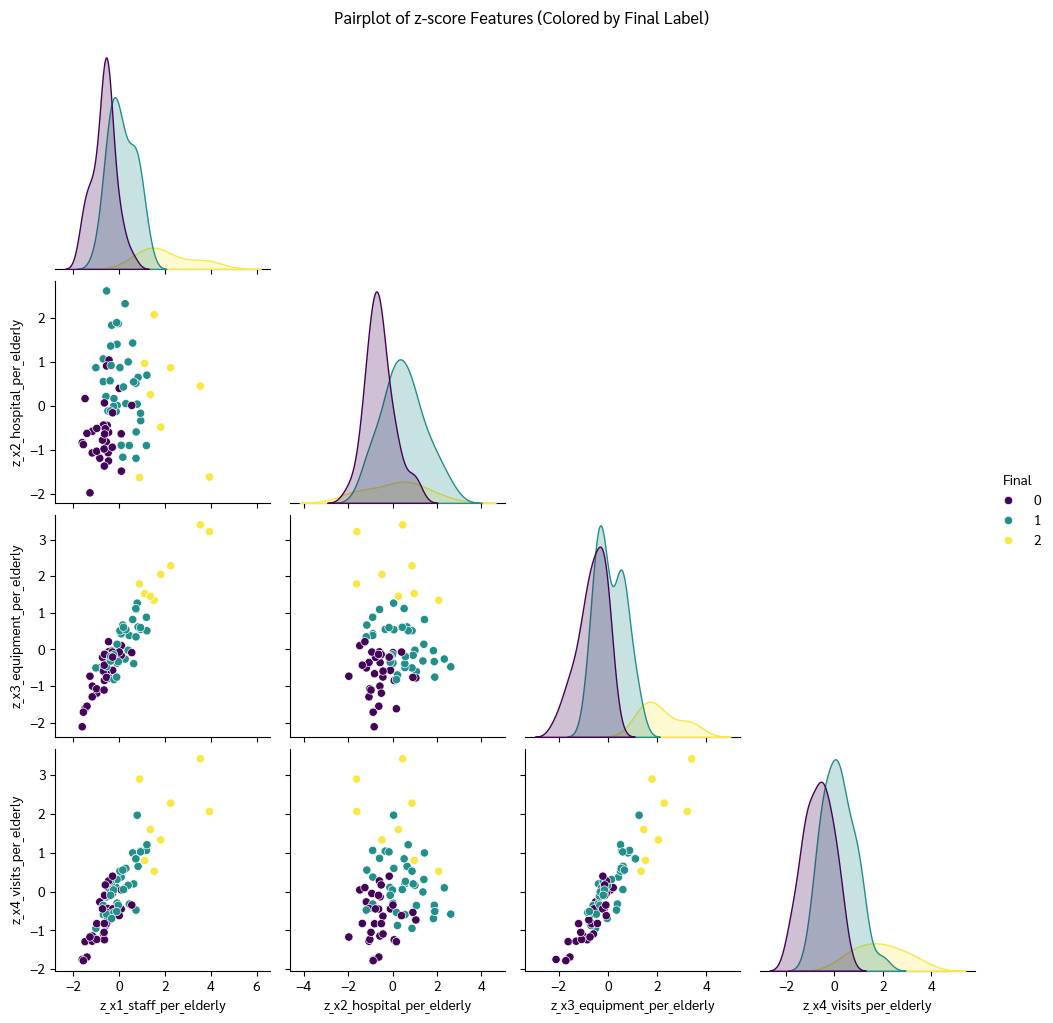

In [ ]:
import seaborn as sns

pairplot_palette = {
    0: "#440457",
    1: "#228f8b",
    2: "#f9e844"
}

sns.pairplot(
    df_labeling[
        ["Final"] +
        [
            "z_x1_staff_per_elderly",
            "z_x2_hospital_per_elderly",
            "z_x3_equipment_per_elderly",
            "z_x4_visits_per_elderly"
        ]
    ],
    hue="Final",
    palette=pairplot_palette,
    corner=True,
    diag_kind="kde"
)

plt.suptitle("Pairplot of z-score Features (Colored by Final Label)", y=1.02)
plt.show()


## Train model

In [28]:
df_labeling.columns

Index(['จังหวัด', 'staff_total', 'elderly', 'equipment_total', 'hospital_gold',
       'opd', 'ipd', 'x1_staff_per_elderly', 'x2_hospital_per_elderly',
       'x3_equipment_per_elderly', 'x4_visits_per_elderly',
       'z_x1_staff_per_elderly', 'z_x2_hospital_per_elderly',
       'z_x3_equipment_per_elderly', 'z_x4_visits_per_elderly', 'GPT5',
       'Claude', 'Gemini', 'Grok', 'DeepSeek', 'Final'],
      dtype='object')

d:\mini\envs\pine\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

d:\mini\envs\pine\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

d:\mini\envs\pine\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

d:\mini\envs\pine\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mult

Logistic: mean=0.7917, std=0.1578, scores=[0.9375     0.6875     0.53333333 0.86666667 0.93333333]
RandomForest: mean=0.8308, std=0.0882, scores=[0.9375     0.75       0.8        0.73333333 0.93333333]
GradientBoosting: mean=0.8308, std=0.0682, scores=[0.875      0.8125     0.73333333 0.8        0.93333333]


d:\mini\envs\pine\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

d:\mini\envs\pine\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

d:\mini\envs\pine\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

d:\mini\envs\pine\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

d:\mini\envs\pine\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



LightGBM: mean=0.7942, std=0.1296, scores=[0.8125     0.625      0.66666667 0.93333333 0.93333333]
XGBoost: mean=0.8567, std=0.0645, scores=[0.9375     0.8125     0.8        0.8        0.93333333]


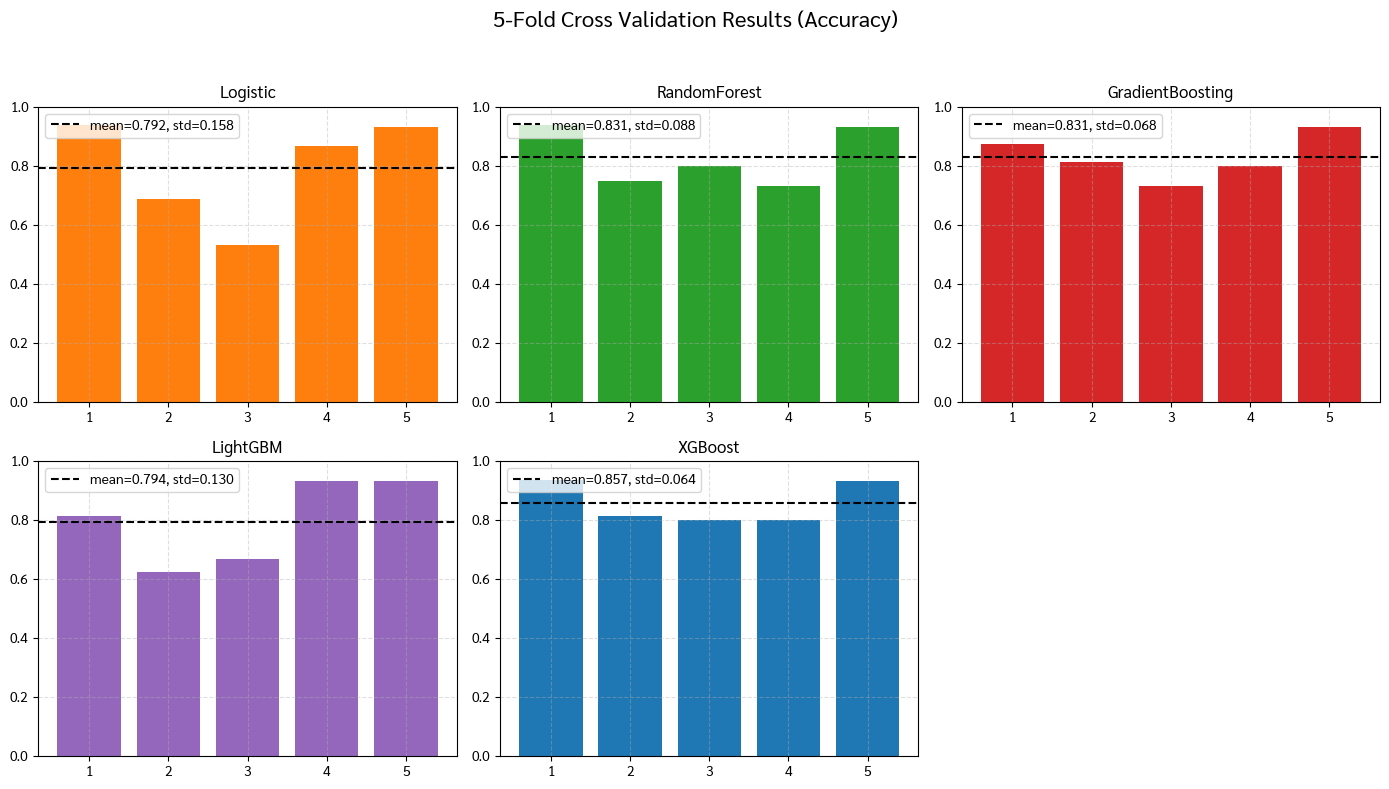

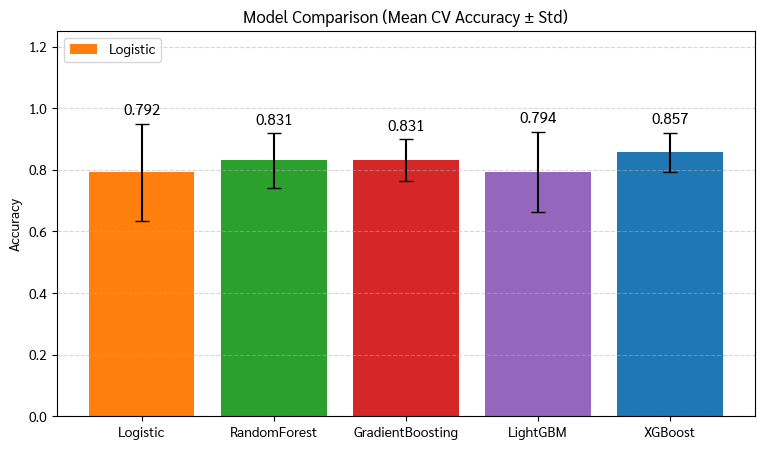

In [40]:
# ===============================
# CONFIG
# ===============================
K_FOLDS = 5
FIGSIZE = (12, 8)

# ===============================
# MODEL COLORS
# ===============================
model_colors = {
    "Logistic": "#ff7f0e",          # ส้ม
    "RandomForest": "#2ca02c",      # เขียว
    "GradientBoosting": "#d62728",  # แดง
    "LightGBM": "#9467bd",          # ม่วง
    "XGBoost": "#1f77b4"            # น้ำเงิน (fix)
}

# ===============================
# LOAD DATA
# ===============================
df = df_labeling.copy()

features = [
    "z_x1_staff_per_elderly",
    "z_x2_hospital_per_elderly",
    "z_x3_equipment_per_elderly",
    "z_x4_visits_per_elderly"
]

X = df[features].values
y = df["Final"].values

skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

# ===============================
# DEFINE MODELS
# ===============================
models = {
    "Logistic": LogisticRegression(
        multi_class="multinomial", solver="lbfgs", max_iter=500
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=500, class_weight="balanced", random_state=42
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42
    ),
    "LightGBM": LGBMClassifier(
        objective="multiclass", num_class=3, n_estimators=500,
        random_state=42, verbose=-1
    ),
    "XGBoost": XGBClassifier(
        objective="multi:softprob", num_class=3,
        eval_metric="mlogloss", n_estimators=500,
        learning_rate=0.05, max_depth=4, random_state=42
    )
}

# ===============================
# RUN CV AND COLLECT RESULTS
# ===============================
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")
    cv_results[name] = scores
    print(f"{name}: mean={scores.mean():.4f}, std={scores.std():.4f}, scores={scores}")

# ===============================
# SUBPLOTS FOR CROSS-VALIDATION
# ===============================
n_models = len(models)
rows = 2
cols = int(np.ceil(n_models / rows))

plt.figure(figsize=(14, 8))
plt.suptitle(f"{K_FOLDS}-Fold Cross Validation Results (Accuracy)", fontsize=16)

i = 1
for name, scores in cv_results.items():
    plt.subplot(rows, cols, i)
    plt.bar(range(1, K_FOLDS+1), scores, color=model_colors[name])
    plt.axhline(scores.mean(), color="black", linestyle="--",
                label=f"mean={scores.mean():.3f}, std={scores.std():.3f}")
    plt.title(name)
    plt.ylim(0, 1)
    plt.xticks(range(1, K_FOLDS+1))
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend(loc="upper left")   
    i += 1

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ===============================
# SUMMARY BAR CHART (MEAN ACC)
# ===============================
means = {m: cv_results[m].mean() for m in cv_results}
stds = {m: cv_results[m].std() for m in cv_results}
colors = [model_colors[m] for m in means.keys()]

plt.figure(figsize=(9, 5))

bars = plt.bar(
    means.keys(),
    means.values(),
    yerr=stds.values(),
    capsize=5,
    color=colors,
    ecolor="black"
)

# ==== ใส่ตัวเลขบนแท่ง (บนหัว error bar) ====
for bar, std in zip(bars, stds.values()):
    height = bar.get_height()
    y_pos = height + std + 0.02   # ← อยู่เหนือ error bar + padding
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        y_pos,
        f"{height:.3f}",
        ha="center", va="bottom",
        fontsize=11, fontweight="bold"
    )

plt.title("Model Comparison (Mean CV Accuracy ± Std)")
plt.ylabel("Accuracy")
plt.ylim(0, 1.25)   # เพิ่มเพดานให้ text เหลือพื้นที่
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.legend(means.keys(), loc="upper left")
plt.show()


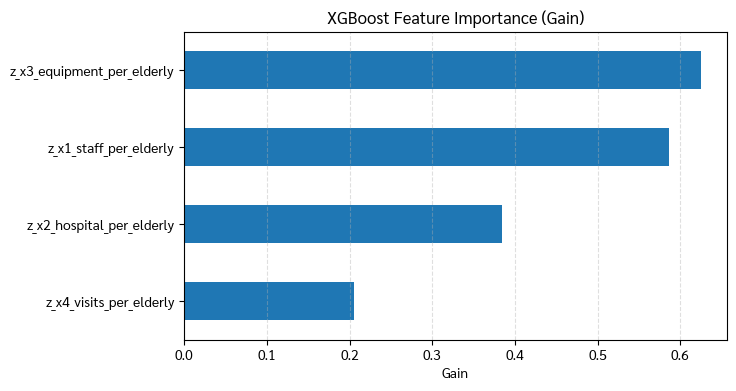

In [35]:
xgb = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="mlogloss",
    random_state=42
)

xgb.fit(X, y)

gain_imp = xgb.get_booster().get_score(importance_type="gain")
gain_imp = pd.Series(gain_imp)

gain_imp.index = [features[int(k[1:])] for k in gain_imp.index]
gain_imp = gain_imp.sort_values()

plt.figure(figsize=(7,4))
gain_imp.plot(kind="barh", color="#1f77b4")
plt.title("XGBoost Feature Importance (Gain)")
plt.xlabel("Gain")
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.show()